# AM2061 Algorithm 3-4
## LU Decomposition

LU Decomposition is an algoritm used to factorise a matrix (system of linear equations).

It modifies a and factorises a matrix A, originally of form $Ax = b$ with:

\begin{gather}
\begin{bmatrix}
a_{11} & \dots & a_{1n} \\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nn}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
\vdots \\
x_n
\end{bmatrix}
=
\begin{bmatrix}
b_1 \\
\vdots \\
b_n
\end{bmatrix}
\end{gather}

but we want this to have form (Doolittles method):

\begin{gather}
\begin{bmatrix}
1 & 0 & \dots & 0 \\
m_{21} & 1 & \ddots & \vdots \\
\vdots & \ddots & \ddots & 0 \\
m_{n1} & \dots & m_{n,n-1} & 1
\end{bmatrix}
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
0 & a_{22} & \ddots & \vdots \\
\vdots & \ddots & \ddots & a_{n-1,n} \\
0 & \dots & 0 & a_{nn}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
\vdots \\
x_n
\end{bmatrix}
=
\begin{bmatrix}
b_1 \\
\vdots \\
b_n
\end{bmatrix}
\end{gather}

As $LUx = b$, thus we must factorise $A$ such that $A = LU$.

A brief explanation is as follows:

* If $Ax = b$ can be solved by Gaussian Elimination without row interchanges, we would like to factorise $A$ such that we have in the form of a *lower* triangular matrix $L$ and an *upper* triangular matrix $U$

* By performing Gaussian elimination on $U$ such that: $E_j - m_{ji} E_i \rightarrow E_j$ with: $m_{ji} = \frac{a_{ji}}{a_{ii}}$
  * This will result in an upper triangular matrix $U$ with zeroes below the diagonal
  
* Compute $m_{ji}$ for $L$, following Doolittles method we set the diagonals of $L$ to be equal to 1

*Note that the "summation" term in this code and pseudocode will cancel with the other term giving zero where needed, and itself will be zero where not*

The following is the pseudocode provided:

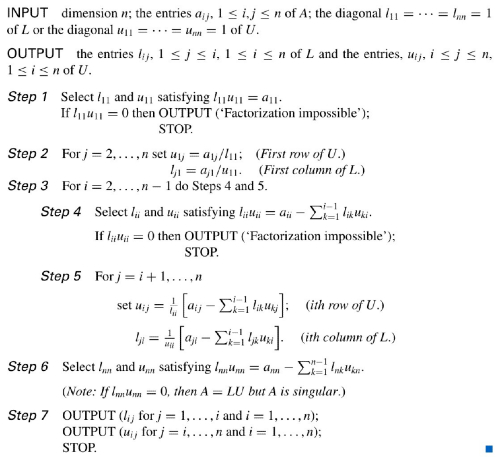

Let us now create this in Python.

First we must define a matrix set of linear equations, for simplicity I will use what was given in L08.

\begin{bmatrix}
1 & 1 & 0 & 3 & 4 \\
2 & 1 & -1 & 1 & 1 \\
3 & -1 & -1 & 2 & -3 \\
-1 & 2 & 3 & -1 & 4
\end{bmatrix}

In [1]:
import numpy as np

# Note that pseudocode starts indexing at 1, so n+1 is total length
a = np.array([[1, 1, 0, 3], 
              [2, 1, -1, 1], 
              [3, -1, -1, 2], 
              [-1, 2, 3, -1]])

# b is actually not needed in this algorithm since we are not 
# working with the augmented matrix to find a set of solutions, used later
b = np.array([[4],
              [1],
              [-3], 
              [4]])

Now let us define the algorithm, we only need to pass in the matrix A.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [2]:
def LUDecomposition(a):
    A = np.copy(a)
    # Get size n
    n = len(A)
    # Matrix U
    U = np.zeros([n, n])
    # Matrix L
    L = np.zeros([n, n])
    
    # Step 1
    # Select l11 and u11 such that l11 * u11 = a11
    # Doolittle's method, set diagonal of L to one.
    L[0][0] = 1
    U[0][0] = A[0][0]
    
    if L[0][0] * U[0][0] == 0:
        print("Factorisation Impossible.")
        return
    
    # Step 2
    # Compute first row of U and first column of L
    for j in range(1, n):
        U[0][j] = A[0][j] / L[0][0] # will just be A[0][j] since L is all 1 on diagonals
        L[j][0] = A[j][0] / U[0][0] # m_ji = a_ji / a_ii
        
    # Step 3
    # Compute other components of U and L
    for i in range(1, n - 1):
        # Step 4
        # Doolittle's method, set diagonal of L to one.
        L[i][i] = 1
        
        summation = 0
        for k in range(i):
            summation += L[i][k] * U[k][i]
        U[i][i] = A[i][i] - summation # filling in formula
        
        if L[i][i] * U[i][i] == 0: # if any 0 on diagonal
            print("Factorisation Impossible.")
            return
        
        # Step 5
        for j in range(i + 1, n):
            summation = 0
            for k in range(i):
                summation += L[i][k] * U[k][j]
            U[i][j] = (A[i][j] - summation) / L[i][i] # ith row of U
            
            summation = 0
            for k in range(i):
                summation += L[j][k] * U[k][i]
            L[j][i] = (A[j][i] - summation) / U[i][i] # ith column of L
            
    # Step 6
    # Doolittle's method, set diagonal of L to one
    # Compute last diagional entry of U
    L[n - 1][n - 1] = 1

    summation = 0
    for k in range(n - 1):
        summation += L[n - 1][k] * U[k][n - 1]
    U[n - 1][n - 1] = A[n - 1][n - 1] - summation
    
    # Check for a zero on the diagonal
    if U[n - 1][n - 1] == 0:
        print("A is singular")
            
    # Step 7
    return (L, U)

We can now test this algorithm for a solution, which will be returned as a tuple (L, U):

In [3]:
L, U = LUDecomposition(a)
print(L)
print(U)
print(np.dot(L, U)) # same as a

[[ 1.  0.  0.  0.]
 [ 2.  1.  0.  0.]
 [ 3.  4.  1.  0.]
 [-1. -3.  0.  1.]]
[[  1.   1.   0.   3.]
 [  0.  -1.  -1.  -5.]
 [  0.   0.   3.  13.]
 [  0.   0.   0. -13.]]
[[ 1.  1.  0.  3.]
 [ 2.  1. -1.  1.]
 [ 3. -1. -1.  2.]
 [-1.  2.  3. -1.]]


As a final note, to solve the system of equations using this method, we require a Forward Substitution on $L$ and a Backward Substitution on $U$:

* Forward Sub simply iterates through each row, setting the first row (since only one value is non-zero) equal to the set of solutions $y$
  * Then, using this, it is easy to see how we can build up the other values since all values in a row (bar the unknown we are looking at) is either zero or known
    * Essentially, we are only calculating the diagonal terms in each row, others are known from previous rows
    
* Back Sub does the same, but in reverse

*See implementation below:*

In [4]:
def ForwardSub(L, b):
    # Get size n
    n = len(L)
    
    # Create an array of zeros as place-holders for y
    # To make it extra clear that this array represents a matrix I've made it n x 1
    y = np.zeros([n, 1])
    
    # Start forward substitution
    y[0][0] = b[0][0] / L[0][0]
    for i in range(1, n):
        summation = 0
        for j in range(i):
            summation += L[i][j] * y[j][0]
            
        value = b[i][0] - summation
        y[i, 0] = value / L[i][i]
        
    return y

In [5]:
def BackwardSub(U, y):
    # Get size n
    n = len(U)
    
    # Create an array of zeros as place-holders for x
    # To make it extra clear that this array represents a matrix I've made it n x 1
    x = np.zeros([n, 1])
    
    # Start backward substitution
    x[n - 1][0] = y[n - 1][0] / U[n - 1][n - 1]
    for i in range(n - 2, -1, -1):
        summation = 0
        for j in range(i + 1, n):
            summation += U[i][j] * x[j][0]
            
        value = y[i][0] - summation
        x[i][0] = value / U[i][i]
        
    return x

Lets try this with our previously found L, U, and already defined b:

In [6]:
y = ForwardSub(L, b)
x = BackwardSub(U, y)
print(x)

[[-1.]
 [ 2.]
 [ 0.]
 [ 1.]]
